[Home Page](../Start_Here.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;
[Next Notebook](CNN's.ipynb)

# CNN Primer and Keras 101


In this notebook, participants will be introduced to CNN, implement it using Keras. For an absolute beginner this notebook would serve as a good starting point.

**Contents of the this notebook:**

- [How a Deep Learning project is planned ?](#Machine-Learning-Pipeline)
- [Wrapping things up with an example ( Classification )](#Image-Classification-on-types-of-clothes)


**By the end of this notebook participant will:**

- Understand the Machine Learning Pipeline
- Write a Deep Learning Classifier and train it.

**We will be building a _Multi-class Classifier_ to classify images of clothing to their respective classes**

## Machine Learning Pipeline

During the bootcamp we will be making use of the following buckets to help us understand how a Machine Learning project should be planned and executed: 

1. **Data**: To start with any ML project we need data which is pre-processed and can be fed into the network.
2. **Task**: There are many tasks present in ML, we need to make sure we understand and define the problem statement accurately.
3. **Model**: We need to build our model, which is neither too deep and complex, thereby taking a lot of computational power or too small that it could not learn the important features.
4. **Loss**: Out of the many _loss functions_ present, we need to carefully choose a _loss function_ which is suitable for the task we are about to carry out.
5. **Learning**: As we mentioned in our last notebook, there are a variety of _optimisers_ each with their advantages and disadvantages. So here we choose an _optimiser_ which is suitable for our task and train our model using the set hyperparameters.
6. **Evaluation**: This is a crucial step in the process to determine if our model has learnt the features properly by analysing how it performs when unseen data is given to it. 

**Here we will be building a _Multi-class Classifier_ to classify images of clothing to their respective classes.**

We will follow the above discussed pipeline to complete the example.

## Image Classification on types of clothes  

####  Step -1 : Data 

We will be using the **F-MNIST ( Fashion MNIST )** dataset, which is a very popular dataset. This dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

<img src="images/fashion-mnist.png" alt="Fashion MNIST sprite"  width="600">

*Source: https://www.tensorflow.org/tutorials/keras/classification*

In [1]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [2]:
# Let's Import the Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, let us store them in an array so that we can use them later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Understanding the Data

In [4]:
#Print Array Size of Training Set 
print("Size of Training Images :"+str(train_images.shape))
#Print Array Size of Label
print("Size of Training Labels :"+str(train_labels.shape))

#Print Array Size of Test Set 
print("Size of Test Images :"+str(test_images.shape))
#Print Array Size of Label
print("Size of Test Labels :"+str(test_labels.shape))

#Let's See how our Outputs Look like 
print("Training Set Labels :"+str(train_labels))
#Data in the Test Set
print("Test Set Labels :"+str(test_labels))

Size of Training Images :(60000, 28, 28)
Size of Training Labels :(60000,)
Size of Test Images :(10000, 28, 28)
Size of Test Labels :(10000,)
Training Set Labels :[9 0 0 ... 3 0 5]
Test Set Labels :[9 2 1 ... 8 1 5]


## Data Pre-processing


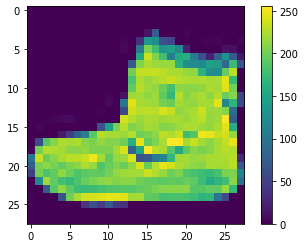

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

The image pixel values range from 0 to 255. Let us now normalise the data range from 0 - 255 to 0 - 1 in both the *Train* and *Test* set. This Normalisation of pixels helps us by optimizing the process where the gradients are computed.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

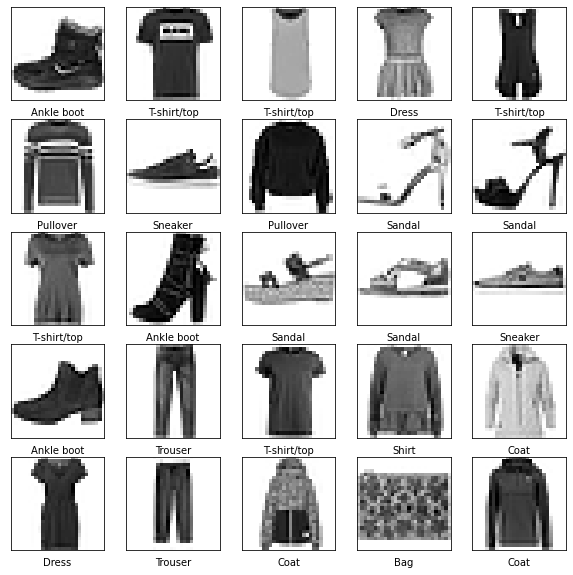

In [7]:
# Let's Print to Veryify if the Data is of the correct format.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Defining our Model

Our Model has three layers :

- 784 Input features ( 28 * 28 ) 
- 128 nodes in hidden layer (Feel free to experiment with the value)
- 10 output nodes to denote the Class

Implementing the same in Keras ( Machine Learning framework built on top of Tensorflow, Theano, etc..) 


In [8]:
from tensorflow.keras import backend as K
K.clear_session()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [10]:
model.fit(train_images, train_labels ,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.6402 - accuracy: 0.7762
Epoch 2/5
1875/1875 [==============================] - 1s 797us/step - loss: 0.3844 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 1s 799us/step - loss: 0.3439 - accuracy: 0.8742
Epoch 4/5
1875/1875 [==============================] - 1s 800us/step - loss: 0.3136 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 1s 796us/step - loss: 0.3007 - accuracy: 0.8880


In [12]:
# with one more dense layer
from tensorflow.keras import backend as K
K.clear_session()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels ,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 883us/step - loss: 0.6077 - accuracy: 0.7883
Epoch 2/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.3689 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.3320 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 2s 884us/step - loss: 0.3050 - accuracy: 0.8884
Epoch 5/5
1875/1875 [==============================] - 2s 882us/step - loss: 0.2832 - accuracy: 0.8941


In [14]:
# with 3 more dense layer, with increased width
from tensorflow.keras import backend as K
K.clear_session()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels ,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.6276 - accuracy: 0.7732
Epoch 2/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.3775 - accuracy: 0.8613
Epoch 3/5
1875/1875 [==============================] - 2s 955us/step - loss: 0.3287 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 2s 952us/step - loss: 0.3069 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 2s 956us/step - loss: 0.2836 - accuracy: 0.8936


In [16]:
# with one dense later with less parameters
from tensorflow.keras import backend as K
K.clear_session()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels ,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 780us/step - loss: 0.6735 - accuracy: 0.7677
Epoch 2/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.4007 - accuracy: 0.8581
Epoch 3/5
1875/1875 [==============================] - 1s 778us/step - loss: 0.3576 - accuracy: 0.8717
Epoch 4/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.3294 - accuracy: 0.8808
Epoch 5/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.3147 - accuracy: 0.8868


## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [11]:
#Evaluating the Model using the Test Set

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3580 - accuracy: 0.8688

Test accuracy: 0.8687999844551086


In [13]:
#Evaluating the Model using the Test Set with one more dense layer

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3781 - accuracy: 0.8665

Test accuracy: 0.8665000200271606


In [15]:
#Evaluating the Model using the Test Set with 3 more dense layers

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3625 - accuracy: 0.8666

Test accuracy: 0.866599977016449


In [17]:
#Evaluating the Model using the Test Set with one dense layer with less parameters

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3774 - accuracy: 0.8666

Test accuracy: 0.866599977016449


## Exercise

Try adding more dense layers to the network above and observe change in accuracy.

We get an Accuracy of 87% in the Test dataset which is less than the 89% we got during the Training phase, This problem in ML is called as Overfitting

## Important:
<mark>Shutdown the kernel before clicking on “Next Notebook” to free up the GPU memory.</mark>

## Licensing
This material is released by OpenACC-Standard.org, in collaboration with NVIDIA Corporation, under the Creative Commons Attribution 4.0 International (CC BY 4.0).

[Home Page](../Start_Here.ipynb)
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;
[Next Notebook](CNN's.ipynb)